In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#Importing calssifiers for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#importing the train csv file from the dataset of the titanic project and analyze its data
train = pd.read_csv('../input/titanic/train.csv')

train.info()
print("------------------------------------------------------")
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------------------------------------------


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
#importing the test csv file from the dataset of the titanic project and analyze its data to be 
#tested and predict its survived passengers
test = pd.read_csv('../input/titanic/test.csv')

test.info()
print("------------------------------------------------------")
test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
------------------------------------------------------


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
#drop the unnecessary features in our train and test tables so we can deal with fewer 
#data points so easing and speeding the analysis
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

**Visualizing the data obtained from the tables using bar charts as charts displaying data shows relations and patterns between data and can be easily read rather than a table**

In [5]:
#Visualize the obtained data to get an easier conclusions about the data 

def visualize(property):
    Survived = train[train['Survived']==1][property].value_counts()
    Dead = train[train['Survived']==0][property].value_counts()
    df = pd.DataFrame([Survived,Dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

**Preprocessing the Sex feature**

,Sex,Survived
1,1,0.742038
0,0,0.188908


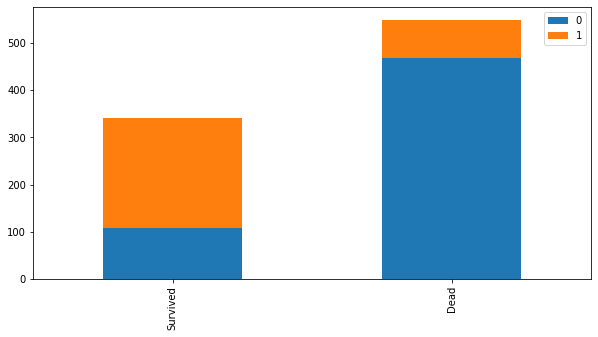

In [6]:
# transfer the strings of male and female to inetgers to be used in the model to get the prediction
# 0 --> male
# 1 --> female
sex_mapping = {"male": 0, "female": 1}
combined = [train,test]
for dataset in combined:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
    
visualize('Sex')
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

**The Sex feature chart shows that females more likely survivied than males**

**Visualizing the P class --Ticket class--**


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


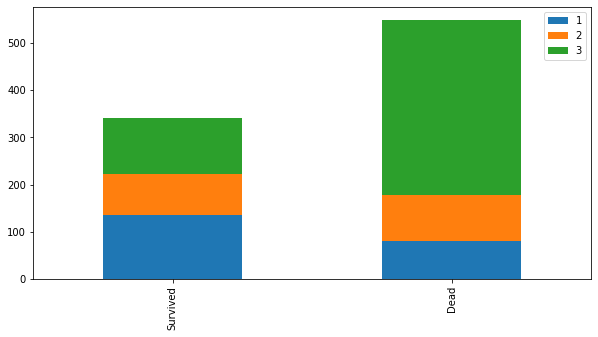

In [7]:
visualize('Pclass')
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

**The Chart shows that people from the first class more likely survivied than other classes especially the third class that more likely dead other than the other classes**

**Visualizing the SibSp --Number of siblings/spouses--**


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


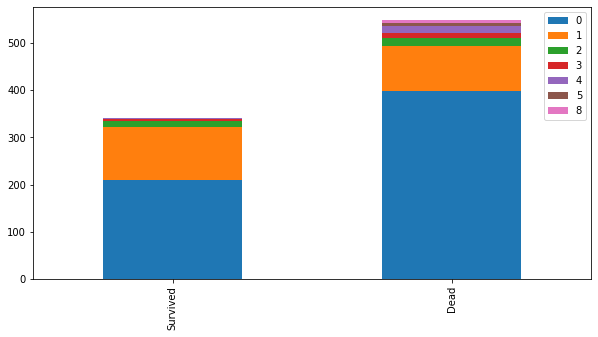

In [8]:
visualize('SibSp')
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


**The chart shows that a person aboarded with more than 2 siblings or spouses more likely survived other than persons without siblings or spouses**

**Visualizing the Parch --Number of parents and children--**

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


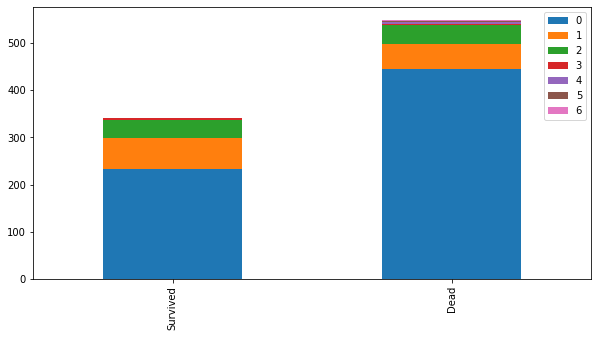

In [9]:
visualize('Parch')
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

**The chart shows that the person who aboarded with more than 2 parents or children more likely survived than persons who aboarded alone**

**Preprocessing the Embarked feature --Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton-- in the train table**

In [10]:
#solve the two missing values in the Embarked feature in the train table as obtained from the 
#analyzation of the data in the first steps
combined = [train,test]
for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [11]:
#Checking whether the embarked feature was handled correctly
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


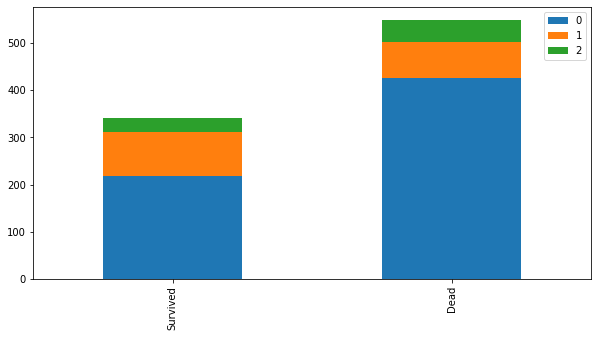

In [12]:
# transfer the strings of S, C and Q to inetgers to be used in the model to get the prediction
#0 --> S
#1 --> C
#2 --> Q
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
combined = [train,test]
for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
    
visualize('Embarked')
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

**The chart shows that a person aboarded from C slightly more likely survived other than from S that has most of the dead**

**Preprocessing the Fare feature in the test table**

In [13]:
#solve the one missing value in the Fare feature in the test table using the median values
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [14]:
#Checking whether the fare feature was handled correctly
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

**Preprocessing the Name feature**

In [15]:
#preprocessing on the Name feature to get the titles to be used in our process in the foreseeable future
combined = [train, test]
for dataset in combined:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [16]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Lady          1
Sir           1
Ms            1
Capt          1
Countess      1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [17]:
title_mapping = {
    "Master" : "Master",
    "Mrs" : "Mrs",
    "Mr" : "Mr",
    "Rev": "Officer",
    "Sir" : "Royalty",
    "Don": "Royalty",
    "Dr": "Officer",
    "Col": "Officer",
    "Mlle": "Miss",
    "Lady" : "Royalty",
    "Capt": "Officer",
    "Jonkheer": "Royalty",
    "Mme": "Mrs",
    "Ms": "Mrs",
    "Countess":"Royalty",    
    "Miss" : "Miss",
    "Major": "Officer",
    "Dona": "Mrs"
    # dona is not a title it is just a name but is added to Mrs category as she is 39 years old
}

combined = [train, test]
for dataset in combined:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [18]:
train['Title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [19]:
#check if the data mapping have been filled correctly and that 
#the Title column is added for the train table
train[train['Title'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [20]:
#check if the data mapping have been filled correctly and that 
#the Title column is added for the test table

test[test['Title'].isnull()]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [21]:
# transfer the strings to inetgers to be used in the model to get the prediction
#Mr (0) for males turns 18 years or above
#Miss (1) for the young girls and women under 30 years unmarried
#Mrs (2) for married women or women above 30 years
#Master (3) for underage males under 18 years old
#Royalty (4) for Royal and high significant people in the society
#Officer (5) for police offers with different ranks

second_title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3,"Royalty": 4, "Officer": 5}
combined = [train, test]
for dataset in combined:
    dataset['Title'] = dataset['Title'].map(second_title_mapping)

,Title,Survived
2,2,0.795276
1,1,0.701087
4,4,0.600000
3,3,0.575000
5,5,0.277778
0,0,0.156673


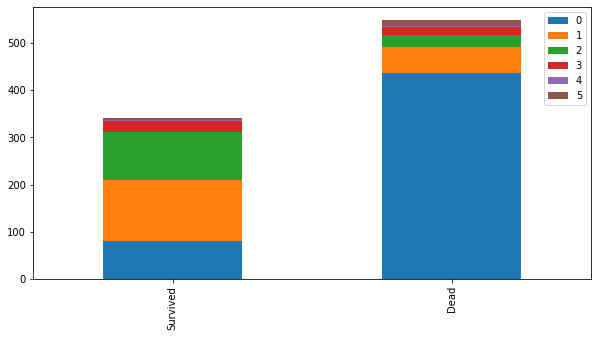

In [22]:
visualize('Title')
train[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)


**The chart shows that most of adult males are dead than the other titles unlike the young, adult, married and unmarried femals**

In [23]:
#drop the feature Name as it is no longer needed 
#In addition to PassengerID from the train table unlike the test table as it will be needed
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)

**Preprocessing the Age feature**

In [24]:
#check if the Age missing values are handled correctly by calcualting median values and assigned in the train table
train['Age'] = train['Age'].fillna(train['Age'].median())
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [25]:
#check if the Age missing values are handled correctly by calcualting median values and assigned in the test table
test['Age'] = test['Age'].fillna(test['Age'].median())
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [26]:
#categorize by the Age for further preprocessing
#children --> 0
#young --> 1
#adult --> 2
#mid-age --> 3
#senior --> 4
combined2 = [train,test] 
for dataset in combined2:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [27]:
#test whether the categorization of the ages have applied correctly to the table
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,0
1,1,1,1,2.0,1,0,71.2833,1,2
2,1,3,1,1.0,0,0,7.9250,0,1
3,1,1,1,2.0,1,0,53.1000,0,2
4,0,3,0,2.0,0,0,8.0500,0,0


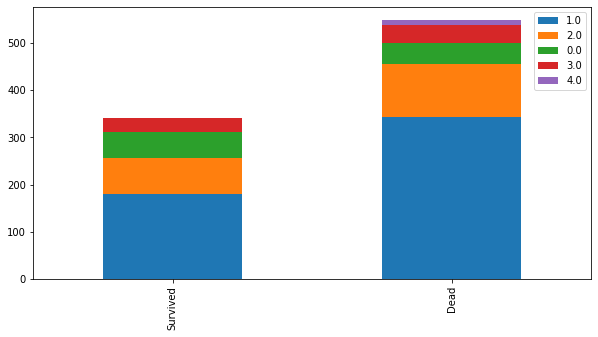

In [28]:
visualize('Age')

**The chart shows that most of the young people -- till 32 years old -- have been dead**

**MODELING**

**There are 60+ predictive modelling algorithms to choose from but after understanding the type of the problem and requirements for the solution to narrow our models, it was found it that it is a classification and regression problem as we want to identify relationship between output (Survived or not) with the other features obtained from the train table (Sex, Age, Name, Titles, Embarked, etc...)**

In [29]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

**first trial model was done by KNeighboursClassifier as in pattern recognition, the k-Nearest Neighbors algorithm is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.**

In [30]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knnscore = knn.score(X_train, Y_train)
print(knnscore)

0.8720538720538721


In [31]:
round(knnscore * 100, 2)

87.21

**Decision tree model was used as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels.**

In [32]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
dtscore = decision_tree.score(X_train, Y_train)
print(dtscore)

0.9450056116722784


In [33]:
round(dtscore * 100, 2)


94.5

**Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.**

In [34]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
rfscore = random_forest.score(X_train, Y_train)
print(rfscore)

0.9450056116722784


In [35]:
round(rfscore * 100, 2)

94.5

**Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.**

In [36]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, Y_train)
Y_pred = logistic_regression.predict(X_test)
random_forest.score(X_train, Y_train)
lrscore = logistic_regression.score(X_train, Y_train)
print(lrscore)

0.8114478114478114


In [37]:
round(lrscore * 100, 2)

81.14

In [38]:
models = pd.DataFrame({
    'Model': ['KNN','Decision Tree', 'Random Forest','Logistic Regression'],
    'Score': [round(knnscore * 100, 2), round(dtscore * 100, 2), round(rfscore * 100, 2), round(lrscore * 100, 2)]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,94.50
2,Random Forest,94.50
0,KNN,87.21
3,Logistic Regression,81.14


**Since that the modeling method descision tree and random forest have scored the highest scores that are exactly equal to 94.5, So anyone would be perfect for creating the submission but here the decision tree model was choosen**

In [39]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
TestFinal = test.drop("PassengerId", axis=1).copy()
prediction = decision_tree.predict(TestFinal)

In [40]:
Submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

Submission.to_csv('Submission.csv', index=False)